In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


%matplotlib inline

In [2]:
!unzip /content/drive/MyDrive/Datasete/FraudDetection_log.csv.zip

Archive:  /content/drive/MyDrive/Datasete/FraudDetection_log.csv.zip
  inflating: PS_20174392719_1491204439457_log.csv  


In [3]:
df = pd.read_csv("/content/PS_20174392719_1491204439457_log.csv")

In [4]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [6]:
df.isna().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [7]:
df.isFraud.value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

In [8]:
print("No Fraud", round(df.isFraud.value_counts()[0]/len(df)*100, 2),"% of the data")
print("Fraud", round(df.isFraud.value_counts()[1]/len(df)*100, 2),"% of the data")

No Fraud 99.87 % of the data
Fraud 0.13 % of the data


In [9]:
df['type'].value_counts()

CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64

In [10]:
Types_of_fraud = df.loc[df.isFraud == 1]

In [11]:
Types_of_fraud.type.value_counts()

CASH_OUT    4116
TRANSFER    4097
Name: type, dtype: int64

In [12]:
Cash_out_fraud = df.loc[(df.isFraud == 1) & (df['type']=="CASH_OUT")]


In [13]:
max(Cash_out_fraud.nameOrig.value_counts())

1

In [14]:
Cash_out_fraud.nameDest.value_counts()

C200064275     2
C1399829166    2
C1650668671    2
C2129197098    2
C1013511446    2
              ..
C1566713324    1
C1955464150    1
C1104137869    1
C377165949     1
C873221189     1
Name: nameDest, Length: 4091, dtype: int64

In [15]:
Transfer_fraud = df.loc[(df.isFraud == 1) & (df['type']=="TRANSFER")]


In [16]:
max(Transfer_fraud.nameDest.value_counts())

1

In [17]:
max(Transfer_fraud.nameOrig.value_counts())

1

In [18]:
dfFlagged = df.loc[df.isFlaggedFraud == 1]

In [19]:
dfFlagged.amount.min(), dfFlagged.amount.max()

(353874.22, 10000000.0)

In [20]:
X = df.loc[(df.type =='TRANSFER') | (df.type == 'CASH_OUT')]

In [21]:
X.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,1,TRANSFER,181.00,C1305486145,181.0,0.0,C553264065,0.0,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.0,C38997010,21182.0,0.00,1,0
15,1,CASH_OUT,229133.94,C905080434,15325.0,0.0,C476402209,5083.0,51513.44,0,0
19,1,TRANSFER,215310.30,C1670993182,705.0,0.0,C1100439041,22425.0,0.00,0,0
24,1,TRANSFER,311685.89,C1984094095,10835.0,0.0,C932583850,6267.0,2719172.89,0,0


In [22]:
y = X['isFraud']
del X['isFraud']


X.drop('isFlaggedFraud', axis=1, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [23]:
X.type = X.type.replace({"TRANSFER": 0,
                           "CASH_OUT": 1})
X.drop(['nameOrig', 'nameDest'], axis=1, inplace= True)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [24]:
X.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
2,1,0,181.00,181.0,0.0,0.0,0.00
3,1,1,181.00,181.0,0.0,21182.0,0.00
15,1,1,229133.94,15325.0,0.0,5083.0,51513.44
19,1,0,215310.30,705.0,0.0,22425.0,0.00
24,1,0,311685.89,10835.0,0.0,6267.0,2719172.89


In [25]:
X.type = X.type.astype(int)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [26]:
X.newbalanceOrig.value_counts()[0] / len(X)

0.9011867922750756

In [27]:
X.oldbalanceOrg.value_counts()[0] / len(X)

0.47234253137352644

In [28]:
Fraud_with_zero_balance_nonZerAmount = X.loc[(X.newbalanceDest==0) & (X.oldbalanceDest == 0) &(X.amount!=0) & y==1]
len(Fraud_with_zero_balance_nonZerAmount) / len(X.loc[y==1])

0.4955558261293072

In [29]:
nonFraud = X.loc[y == 0]
Nonfraud_with_zero_balance_nonZerAmount = nonFraud.loc[(nonFraud.newbalanceDest==0) & (nonFraud.oldbalanceDest == 0) &(nonFraud.amount)]
len(Nonfraud_with_zero_balance_nonZerAmount) / len(nonFraud)

0.0006176245277308345

In [30]:
X['errorBalanceOrig'] = X.newbalanceOrig + X.amount - X.oldbalanceOrg
X["eroorBalanceDest"] = X.oldbalanceDest + X.amount - X.newbalanceDest

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


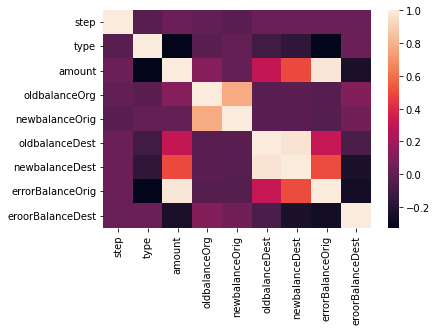

In [31]:
import seaborn as sns
corr = X.corr()
sns.heatmap(corr,
    xticklabels=corr.columns.values,
    yticklabels=corr.columns.values
)

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import confusion_matrix,precision_recall_curve,auc,roc_auc_score,roc_curve,recall_score,classification_report 
from sklearn import metrics

In [36]:
X_train

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,errorBalanceOrig,eroorBalanceDest
1326860,137,1,256796.36,0.00,0.00,826969.43,1083765.80,256796.36,-1.000000e-02
3095732,235,1,76426.86,20808.00,0.00,398149.07,474575.92,55618.86,1.000000e-02
4353969,309,1,173912.66,0.00,0.00,465746.64,639659.30,173912.66,0.000000e+00
529479,20,1,197978.48,204571.00,6592.52,0.00,197978.48,0.00,0.000000e+00
3996516,298,1,352228.73,1484.00,0.00,163019.07,515247.80,350744.73,0.000000e+00
...,...,...,...,...,...,...,...,...,...
3864478,283,1,99368.91,85416.00,0.00,1258118.85,1357487.77,13952.91,-1.000000e-02
5393590,377,1,143543.26,9021.00,0.00,1021168.59,1164711.85,134522.26,0.000000e+00
5092890,355,1,108673.92,73166.00,0.00,86356.64,195030.55,35507.92,1.000000e-02
6358039,711,0,986623.96,986623.96,0.00,0.00,0.00,0.00,9.866240e+05


In [38]:
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


In [39]:
print("Accuracy of Logistic Regression model is:",
metrics.accuracy_score(y_test, y_pred)*100)

Accuracy of Logistic Regression model is: 99.6995029616555
